In [2]:
import random
import sys
sys.path.append("..")

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rpy2
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import seaborn as sns
from shapely.geometry import Point
get_ipython().magic(u'matplotlib inline')
%matplotlib inline


from connect_db import db_connection

# filter annyoing warning from pandas
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_clusters = pd.read_csv("../../clusters_Jul_Aug_10000_sample.csv")

In [4]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Unnamed: 0    10000 non-null int64
ids           10000 non-null int64
cluster       10000 non-null int64
dtypes: int64(3)
memory usage: 234.5 KB


In [8]:
username='kmohan'

In [10]:
cred_location = '/mnt/data/'+username+'/utils/data_creds_redshift.json.nogit'
db = db_connection.DBConnection(cred_location)

In [12]:
# query for the 1week sample

query = """
select customer_nr, com_locs_new as locations
from tuscany.customer_arrays
where times_new is not null
"""
# drop 'customer_id' to save memory
df_features = db.sql_query_to_data_frame(query, cust_id=True)

In [13]:
df_features['customer_nr'] = df_features['customer_nr'].astype(str).astype(int)

In [8]:
# df_features['mcc'] = df_features['mcc'].astype(str).astype(int)
# df_features['hrs_in_italy'] = df_features['hrs_in_italy'].astype(str).astype(float)
# df_features['hrs_in_tusc'] = df_features['hrs_in_tusc'].astype(str).astype(float)

In [14]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781079 entries, 0 to 5781078
Data columns (total 2 columns):
customer_nr    int64
locations      object
dtypes: int64(1), object(1)
memory usage: 88.2+ MB


In [15]:
df_clusters.head()

,Unnamed: 0,ids,cluster
0,1,2171235,1
1,2,7247821,2
2,3,6970921,3
3,4,2086771,3
4,5,2409392,2


In [16]:
df_clusters = df_clusters.merge(df_features,how='inner',left_on='ids',right_on='customer_nr')

In [23]:
del df_features

In [24]:
df_clusters.head()

,Unnamed: 0,ids,cluster,customer_nr,locations
0,1,2171235,1,2171235,"1154, 1076, 1044, 47006, 48017, 47006, 47005, ..."
1,2,7247821,2,7247821,"48017, 48036, 48035, 48036, 48035, 48036, 4803..."
2,3,6970921,3,6970921,"46005, 46024, 46005, 46024, 46005, 46024, 46005"
3,4,2086771,3,2086771,"48017, 48006, 100005, 47002, 47014, 47020, 470..."
4,5,2409392,2,2409392,"104018, 49005, 49009"


In [29]:
df_cluster_results = df_clusters.iloc[:,2:5]

In [30]:
df_cluster_results.head()

,cluster,customer_nr,locations
0,1,2171235,"1154, 1076, 1044, 47006, 48017, 47006, 47005, ..."
1,2,7247821,"48017, 48036, 48035, 48036, 48035, 48036, 4803..."
2,3,6970921,"46005, 46024, 46005, 46024, 46005, 46024, 46005"
3,3,2086771,"48017, 48006, 100005, 47002, 47014, 47020, 470..."
4,2,2409392,"104018, 49005, 49009"


In [31]:
df_medoids = pd.read_csv("../../mediods_5_Jul_Aug_10000_sample.csv")

In [32]:
df_medoids.head()

,Unnamed: 0,x
0,1,6830799
1,2,5955872
2,3,1179935
3,4,6804043
4,5,1418535


In [33]:
df_cluster_results['medoids'] = 0

In [34]:
df_cluster_results.head()

,cluster,customer_nr,locations,medoids
0,1,2171235,"1154, 1076, 1044, 47006, 48017, 47006, 47005, ...",0
1,2,7247821,"48017, 48036, 48035, 48036, 48035, 48036, 4803...",0
2,3,6970921,"46005, 46024, 46005, 46024, 46005, 46024, 46005",0
3,3,2086771,"48017, 48006, 100005, 47002, 47014, 47020, 470...",0
4,2,2409392,"104018, 49005, 49009",0


In [45]:
for i in range(0,len(df_medoids)):
    df_cluster_results.loc[df_cluster_results['customer_nr'] == df_medoids['x'][i],'medoids'] = 1

In [48]:
df_cluster_results.to_csv("../../../shared/cluster_results_Jul_Aug_10000_sample.csv")

In [47]:
!pwd

/mnt/data/kmohan/TPT_tourism/descriptives


In [33]:
for i in range(1,6):
    df_tmp = df_clusters.loc[df_clusters['cluster'] == i,:]
    print(df_tmp[['mcc','hrs_in_tusc','hrs_in_italy']].describe())
    #print(df_tmp['mcc'].value_counts())
    

               mcc  hrs_in_tusc  hrs_in_italy
count  1606.000000  1606.000000   1606.000000
mean    223.547323   176.546700    183.207347
std      59.441261   153.689702    153.753109
min     202.000000     1.000000      1.000000
25%     208.000000    54.000000     61.000000
50%     208.000000   143.000000    149.000000
75%     208.000000   256.750000    263.000000
max     732.000000   706.000000    718.000000
               mcc  hrs_in_tusc  hrs_in_italy
count  5634.000000  5634.000000   5634.000000
mean    295.776713   154.130280    161.077742
std     110.579157   144.120849    143.732294
min     202.000000     1.000000      1.000000
25%     230.000000    44.000000     50.000000
50%     262.000000   114.500000    119.000000
75%     286.000000   221.000000    228.750000
max     901.000000   720.000000    735.000000
               mcc  hrs_in_tusc  hrs_in_italy
count  1083.000000  1083.000000   1083.000000
mean    215.215143   182.009234    187.696214
std      44.182729   150.921433   

In [24]:
df_med = pd.read_csv("../../mediods_5_Jul_Aug_10000_sample.csv")

In [17]:
# Load maps data 

# load data from TPT
regions = r"/mnt/data/shared/Boundaries regions and municipalities Italy 2016/Reg2016_WGS84_g/Reg_2016_WGS84_g.shp"
provinces = r"/mnt/data/shared/Boundaries regions and municipalities Italy 2016/CMProv2016_WGS84_g/CMprov2016_WGS84_g.shp"
municipalities = r"/mnt/data/shared/Boundaries regions and municipalities Italy 2016/Com2016_WGS84_g/Com2016_WGS84_g.shp"
new_reg =  r"/mnt/data/shared/ITA_shapefiles/Tus_28districts.shp"

# important cities 
important_cities_file = r"/mnt/data/shared/important_cities.csv"
df_impcit = pd.read_csv(important_cities_file)

In [18]:
gdf_mun = gpd.read_file(municipalities)
gdf_mun['geometry'] = gdf_mun['geometry'].to_crs(epsg=4326)
#gdf_mun = gdf_mun[gdf_mun["COD_REG"] == 9]

In [19]:
def plot_trajectory(ax,list_of_comunes=False):
    '''
    Parameters:
    
        list_of_comunes: list of pro_com (as ints)    
    '''
    
    # comune centroids 
    df_centroids = pd.read_csv(r"/mnt/data/shared/comune_centroids.csv")
    
    gdf_mun.plot(ax=ax, color='white', edgecolor='gray', alpha=0.25)
    
    if list_of_comunes is not False:
        
        trip = pd.DataFrame(list_of_comunes, columns=['PRO_COM'])
        trip = trip.merge(df_centroids, how='inner', left_on='PRO_COM', right_on='pro_com')
        
    plt.plot(trip['lat'], trip['lon'], '-o',linewidth=1)
    plt.plot(trip['lat'][0], trip['lon'][0], '-x',markersize=10,color='k')

In [20]:
def important_cities(df_impcit):
    """
    Include important cities in the plot
    
    Params:
        df_impcit: DataFrame with the 'lat', 'long', and 'city' fields
    """

    for i, name in enumerate(list(df_impcit.city)):
        plt.plot(df_impcit.long[i], df_impcit.lat[i], 'o', color='k', markersize=6)
        plt.annotate(name, (df_impcit.long[i]+0.03, df_impcit.lat[i]),
                     fontsize=10)

In [21]:
df_cluster_labels = pd.read_csv("../../clusters_Jul_Aug_10000_sample.csv")

In [22]:
df_sample = df_cluster_labels[df_cluster_labels['cluster'] == 1].sample(n=2)

In [23]:
list(df_sample['ids'].astype(str))[0]

'6604530'

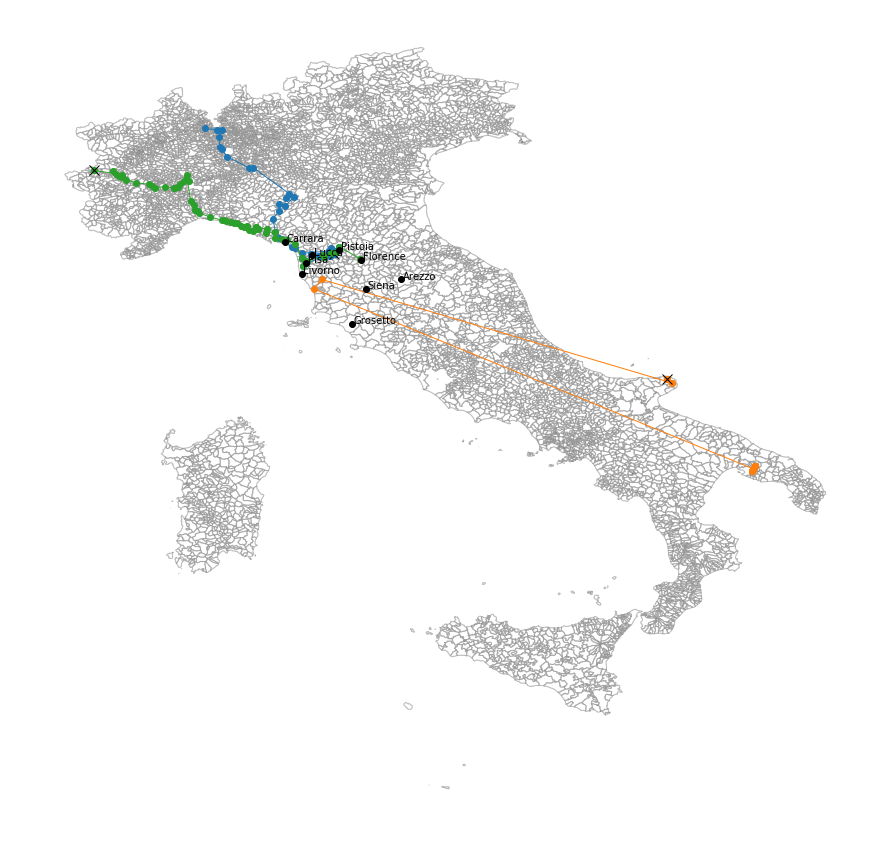

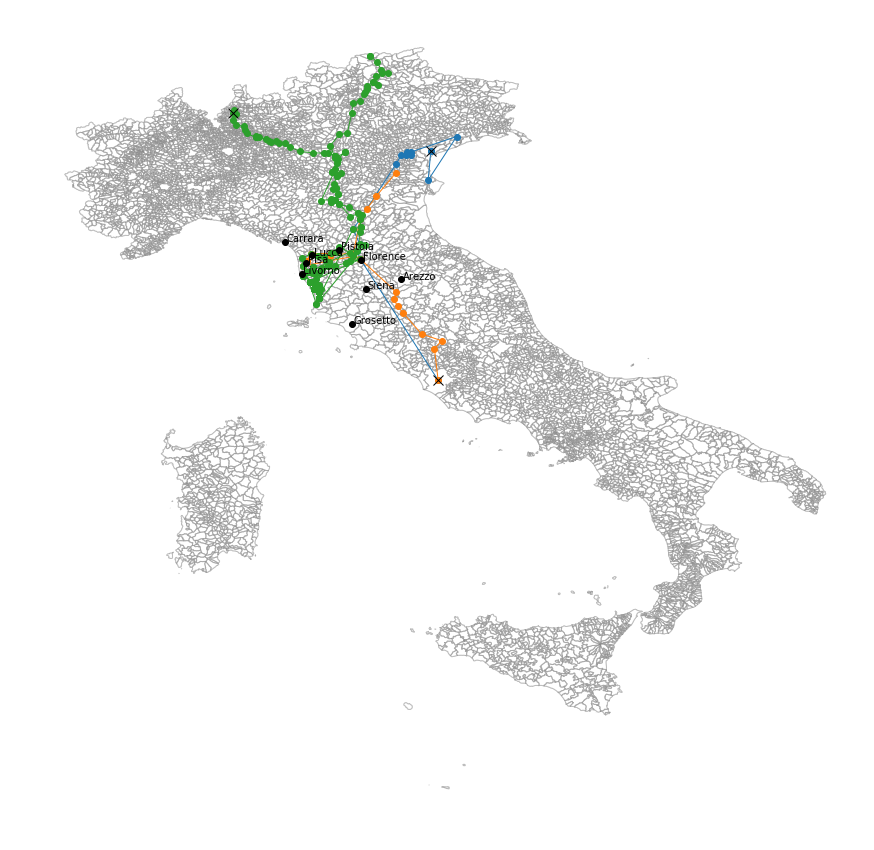

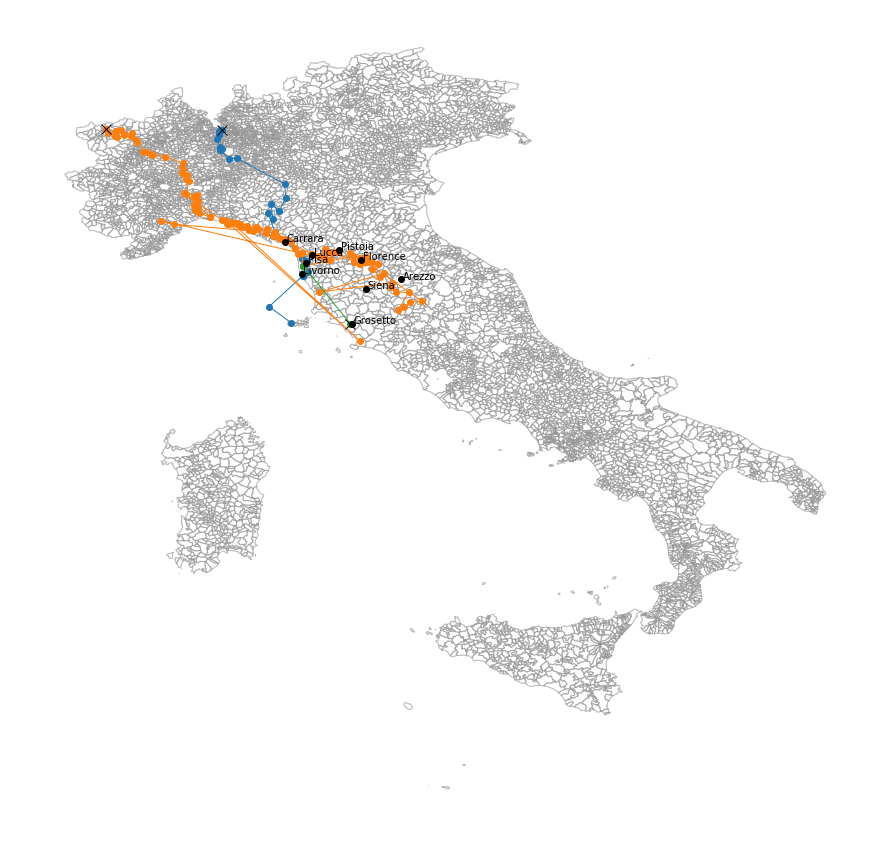

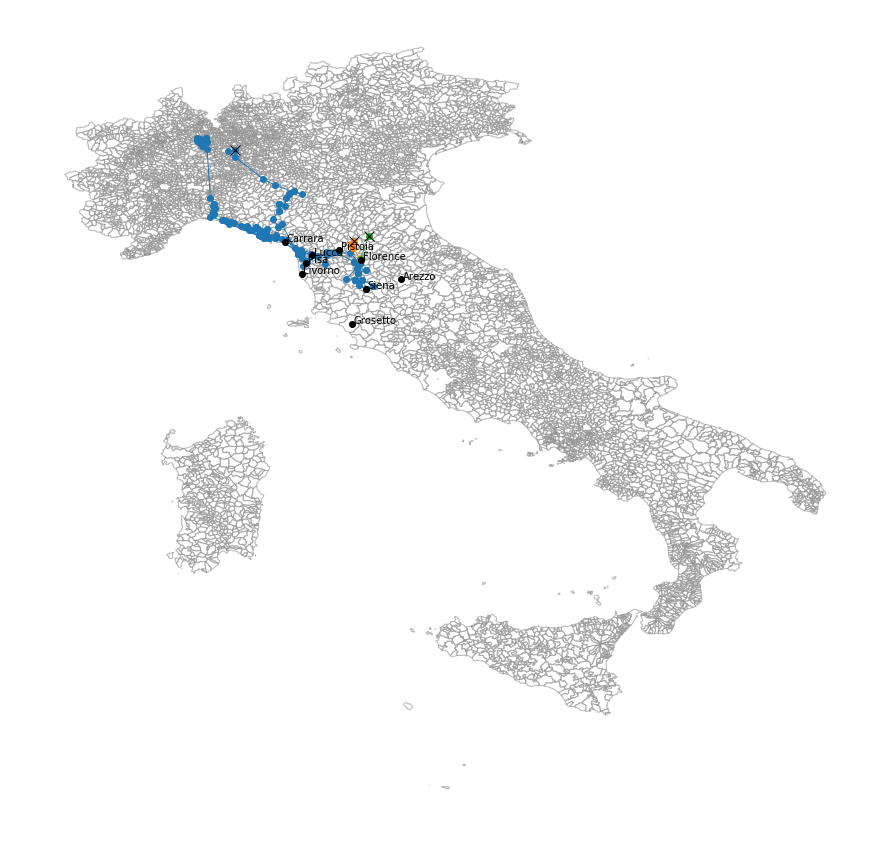

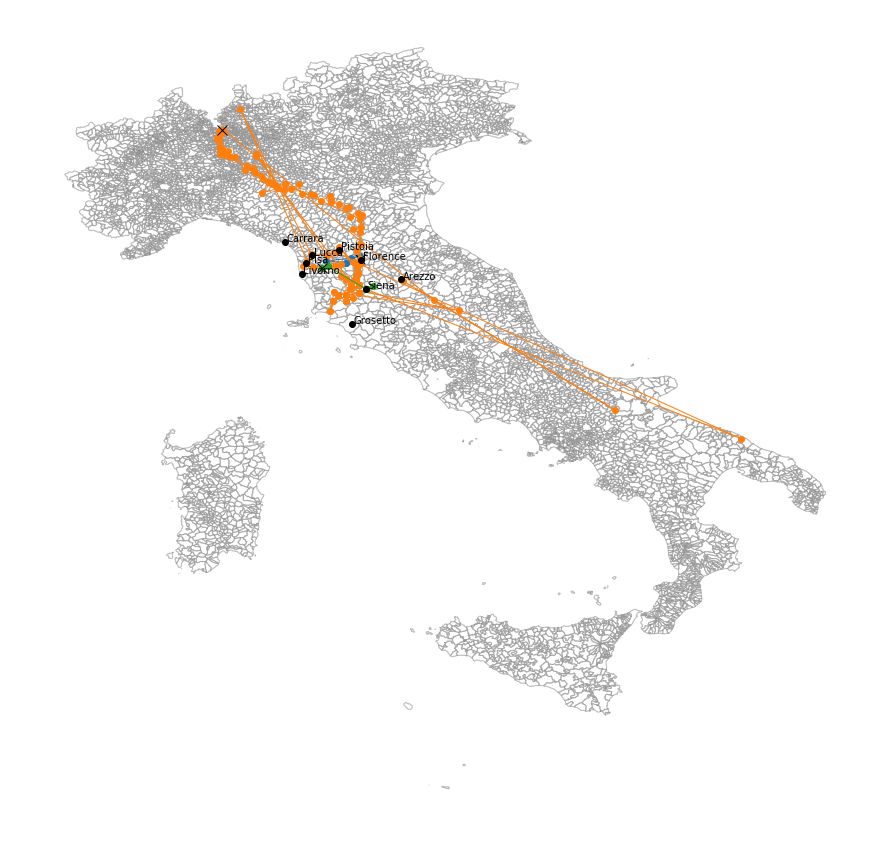

In [26]:
for i in range(1,6):

    # query for the 1week sample

    df_sample = df_cluster_labels[df_cluster_labels['cluster'] == i].sample(n=5)

    query = """
    select customer_nr,com_locs_new as com_locs from tuscany.customer_arrays
    where customer_nr in ("""+df_med['x'].astype(str)[i-1]+""","""+list(df_sample['ids'].astype(str))[0]+""","""+list(df_sample['ids'].astype(str))[1]+""","""+list(df_sample['ids'].astype(str))[2]+""","""+list(df_sample['ids'].astype(str))[3]+""","""+list(df_sample['ids'].astype(str))[4]+""")
    """
    # drop 'customer_id' to save memory
    df_clusters = db.sql_query_to_data_frame(query, cust_id=True)
    df_clusters['com_locs'] = df_clusters['com_locs'].str.split(', ').tolist()
    
    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot(1,1,1)

    for k in range(0,3):
        plot_trajectory(ax,list(map(int,df_clusters['com_locs'][k])))

    important_cities(df_impcit)

    #plt.ylim([41,46])
    #plt.xlim([6,16])
    plt.axis('off')

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(1,1,1)

for i in range(0,5):
    plot_trajectory(ax,list(map(int,df_clusters['com_locs'][i])))
    
important_cities(df_impcit)

#plt.ylim([41,46])
#plt.xlim([6,16])
plt.axis('off')
